In [1]:
!pip install sounddevice

                                              0.0/199.7 kB ? eta -:--:--
     -------------------------------------- 199.7/199.7 kB 6.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install --upgrade pip


                                              0.0/2.1 MB ? eta -:--:--
     -------                                  0.4/2.1 MB 11.6 MB/s eta 0:00:01
     ------------------                       0.9/2.1 MB 11.8 MB/s eta 0:00:01
     --------------------------------         1.7/2.1 MB 11.8 MB/s eta 0:00:01
     ---------------------------------------- 2.1/2.1 MB 11.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.1
    Uninstalling pip-23.1.1:
      Successfully uninstalled pip-23.1.1


In [1]:
import math
import random
import numpy as np
import pandas as pd
import sounddevice as sd
import matplotlib.pyplot as plt

# 2. Gradiente Descendiente

Se crea el algoritmo del Gradiente Descendiente, en una función, modificando un poco la del ejemplo del punto 2.

In [28]:
def yPredecida(a, b, c, d, x):
    return a * np.sin(b * x + c) + d

def gradientesDecendiente(x, y, epoch):
    n = len(x)
    rsl = []
    lr =  0.01
    batch = 500
    a = random.random()
    b = random.random()
    c = random.random()
    d = 0
    
    
    for i in range(epoch):
        a_gradiente = 0
        b_gradiente = 0
        c_gradiente = 0
        d_gradiente = 0
        e = 0

        for _ in range(batch):
            ix = int(random.uniform(0, n))
            y_pred = y_predict(a, b, c, d, x[ix])
            error = y[ix] - y_pred

            e += error**2
            a_gradiente += 2 * error * -1.0*np.sin(b * x[ix] + c)
            b_gradiente += 2 * error * -1.0*a * np.cos(b * x[ix] + c) * x[ix]
            c_gradiente += 2 * error * -1.0*a * np.cos(b * x[ix] + c)
            d_gradiente += 2 * error

        a -= lr * a_gradiente / batch
        b -= lr * b_gradiente / batch
        c -= lr * c_gradiente / batch

        e /= batch
        rsl.append([a, b, c, e])
        print(f"Amplitude: {a}, Period: {b}, Constant: {c}, Error: {e}")

    return rsl, a, b, c

In [29]:
data = pd.read_csv('data/senal.csv')

Cargamos los datos a la varibles x, y

In [30]:
x = data['x'].values
y = data['y'].values

In [31]:
epoch = [1000, 2000]

### Aplicamos la funcion gradiente decendiente con 10 epoch

In [32]:
resultados, a, b, c = gradientesDecendiente(x, y,epoch =10)

Amplitude: 0.49569875511758077, Period: 0.39413199827980955, Constant: 0.9752931187719338, Error: 4.797313859542397
Amplitude: 0.47906623174657126, Period: 0.3934731845098382, Constant: 0.9755017573460562, Error: 4.492488223498238
Amplitude: 0.46625568930151556, Period: 0.39240305812542414, Constant: 0.9755946667569997, Error: 4.346111593383316
Amplitude: 0.45107053509964234, Period: 0.39155732254101594, Constant: 0.9757166007762171, Error: 4.490994497083157
Amplitude: 0.43763225399005934, Period: 0.3904711374627751, Constant: 0.9757369200737223, Error: 4.386638789652988
Amplitude: 0.4176362895519304, Period: 0.38998082756338587, Constant: 0.9759256059000159, Error: 4.8708578615211895
Amplitude: 0.40271968986433737, Period: 0.38915394610932585, Constant: 0.976035667499917, Error: 4.559423075292863
Amplitude: 0.3844707772507972, Period: 0.3884249594219116, Constant: 0.9761070703919396, Error: 4.805819626741291
Amplitude: 0.36719048378747715, Period: 0.3878492807940319, Constant: 0.97626

Creamos una tabla con los datos

In [33]:
tablaResultados = pd.DataFrame(resultados, columns=['error', 'period', 'amplitude','constant'])
print(tablaResultados)

      error    period  amplitude  constant
0  0.495699  0.394132   0.975293  4.797314
1  0.479066  0.393473   0.975502  4.492488
2  0.466256  0.392403   0.975595  4.346112
3  0.451071  0.391557   0.975717  4.490994
4  0.437632  0.390471   0.975737  4.386639
5  0.417636  0.389981   0.975926  4.870858
6  0.402720  0.389154   0.976036  4.559423
7  0.384471  0.388425   0.976107  4.805820
8  0.367190  0.387849   0.976269  4.757489
9  0.352361  0.387462   0.976573  4.548284


Generamos la señal

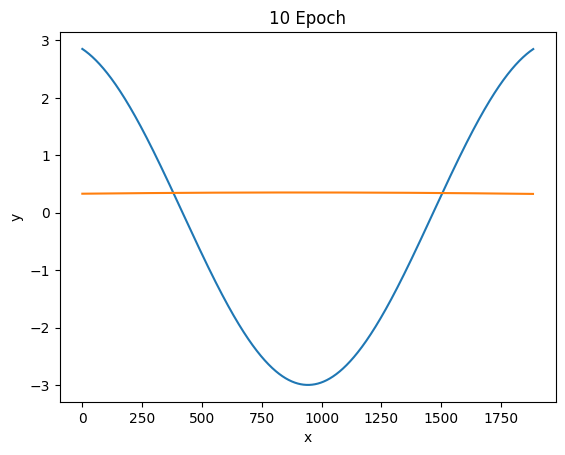

In [34]:
plt.title("10 Epoch")
plt.xlabel('x')
plt.ylabel("y")
plt.plot(y)
ix = -1
plt.plot([y_predict(a,b,c,0,xi)for xi in x[:ix]])

### Aplicamos la funcion gradiente decendiente con 400 epoch

In [35]:
resultados, a, b, c = gradientesDecendiente(x, y, epoch=400)

Amplitude: 0.5126134972283638, Period: 0.6376963029584757, Constant: 0.24373064721644655, Error: 4.633144267042813
Amplitude: 0.49569026337883204, Period: 0.6322644646933067, Constant: 0.24131145371925422, Error: 4.436322218548618
Amplitude: 0.4806468931808228, Period: 0.6267585248476665, Constant: 0.2386884308649694, Error: 4.257893077949931
Amplitude: 0.4654417723922304, Period: 0.621662538957494, Constant: 0.23655637223121678, Error: 4.451618315462054
Amplitude: 0.448145887460611, Period: 0.6161919297230487, Constant: 0.23429082476503116, Error: 4.895463958296218
Amplitude: 0.43405434805495247, Period: 0.6109847727322596, Constant: 0.23215490667305447, Error: 4.714952269135043
Amplitude: 0.4200874604566604, Period: 0.6055081173933113, Constant: 0.22962491021871775, Error: 4.664228869072414
Amplitude: 0.4047052058233904, Period: 0.5998871468965193, Constant: 0.2268881541541009, Error: 4.742757978555738
Amplitude: 0.39181279930078844, Period: 0.5953923658488504, Constant: 0.2249025030

Amplitude: -0.3274215107576331, Period: 0.6254088487278304, Constant: 0.2176229662088114, Error: 3.7961670979278543
Amplitude: -0.3286245716311534, Period: 0.6279645398110694, Constant: 0.21815303226197932, Error: 3.9056969639753705
Amplitude: -0.3326988308363823, Period: 0.630531896057793, Constant: 0.21866800050217378, Error: 3.9163493295871246
Amplitude: -0.335321852466034, Period: 0.6323782067904659, Constant: 0.21864815644070595, Error: 3.5794685113992277
Amplitude: -0.3358740865561104, Period: 0.634732423905442, Constant: 0.21900633716987913, Error: 3.7527241076733553
Amplitude: -0.3360749616598529, Period: 0.6371138250240435, Constant: 0.21927155406995924, Error: 3.9110106430832037
Amplitude: -0.34190459752380886, Period: 0.639727693195968, Constant: 0.21980685816733836, Error: 3.8935134637530986
Amplitude: -0.34427619744752774, Period: 0.6424109899826992, Constant: 0.22030031776909478, Error: 3.967914535483214
Amplitude: -0.34667291030607617, Period: 0.6453030786214211, Constan

Amplitude: -0.6021511414726293, Period: 1.0853459856449965, Constant: 0.20274291455286478, Error: 3.2856695588737006
Amplitude: -0.602374181709251, Period: 1.0898075912607286, Constant: 0.20173580822302983, Error: 3.7329911631883435
Amplitude: -0.606466228036797, Period: 1.0924233951521158, Constant: 0.20025168682815309, Error: 3.497981373412252
Amplitude: -0.6071311815312618, Period: 1.0947293530042292, Constant: 0.1980561553117088, Error: 3.758679622882781
Amplitude: -0.6116052178500904, Period: 1.097581935730877, Constant: 0.19654496644496283, Error: 3.622495910044366
Amplitude: -0.6143957520275753, Period: 1.1034569454707874, Constant: 0.1962830218898374, Error: 3.7613929121832035
Amplitude: -0.6168252207996684, Period: 1.105985758134936, Constant: 0.1943447079124895, Error: 3.696193684138718
Amplitude: -0.6177956994333177, Period: 1.1104064413642094, Constant: 0.19321673834892628, Error: 3.7360681284064685
Amplitude: -0.6184299945261323, Period: 1.1132989480348876, Constant: 0.191

Amplitude: -0.7761990821284072, Period: 1.2950689042501764, Constant: 0.03898894908216102, Error: 3.513075180215352
Amplitude: -0.7785348659282375, Period: 1.29730151113135, Constant: 0.035844629420243815, Error: 3.400994508474593
Amplitude: -0.7811973644042127, Period: 1.2966056833160537, Constant: 0.031255424764663226, Error: 3.4448005898768805
Amplitude: -0.7843732248577493, Period: 1.2985853117414081, Constant: 0.027669203503508065, Error: 3.6731942511632765
Amplitude: -0.7869755614236665, Period: 1.3003706690893804, Constant: 0.02408402642031811, Error: 3.544461425359533
Amplitude: -0.7908810795257227, Period: 1.2998861504584245, Constant: 0.019781139270070053, Error: 3.3408431280460555
Amplitude: -0.7920182385536839, Period: 1.3008255075862736, Constant: 0.01580123354133957, Error: 3.4522221552140615
Amplitude: -0.7931475298129682, Period: 1.3040098186739442, Constant: 0.012513541898803413, Error: 3.7145430181934334
Amplitude: -0.7954274458521416, Period: 1.3043638706858967, Cons

In [36]:
tablaResultados = pd.DataFrame(resultados, columns=['Amplitude', 'Period', 'Constant', 'Error'])
print(tablaResultados)

     Amplitude    Period  Constant     Error
0     0.512613  0.637696  0.243731  4.633144
1     0.495690  0.632264  0.241311  4.436322
2     0.480647  0.626759  0.238688  4.257893
3     0.465442  0.621663  0.236556  4.451618
4     0.448146  0.616192  0.234291  4.895464
..         ...       ...       ...       ...
395  -0.899921  1.421395 -0.189303  3.325091
396  -0.903057  1.422121 -0.194290  3.281748
397  -0.904937  1.422109 -0.199755  3.285532
398  -0.910754  1.424511 -0.203421  3.210055
399  -0.913125  1.424354 -0.209140  3.354994

[400 rows x 4 columns]


Dibujamos la señal

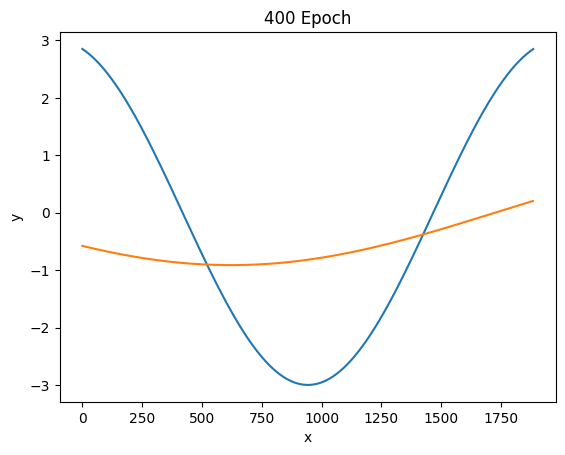

In [37]:
plt.title("400 Epoch")
plt.xlabel('x')
plt.ylabel("y")
plt.plot(y)
ix = -1
plt.plot([y_predict(a,b,c,0,xi)for xi in x[:ix]])

### Por último utiliza los parámetros aprendidos, y crea la señal por un periodo más largo de tiempo long_s = [ y_predict(a,b,c,d,xi) for xi in np.arange(x_min , 20*math.pi, 0.001).astype(np.float32)], dibuja la señal, y escuchala utilizando la libraria (import sounddevice as sd y el método sd.play(long_s)

Para 10 Epoch

In [38]:
resultados, a, b, c = gradientesDecendiente(x, y, epoch=10)

Amplitude: 0.6756553058433464, Period: 0.5139956332231974, Constant: 0.7693520832657437, Error: 4.8201491536643735
Amplitude: 0.6542058339298116, Period: 0.5125697379221363, Constant: 0.7693905196975261, Error: 5.149137875190863
Amplitude: 0.6351927871471214, Period: 0.5106271505364992, Constant: 0.7691745520132893, Error: 4.924860836398398
Amplitude: 0.6130833456054723, Period: 0.5088222862293107, Constant: 0.7689017085707753, Error: 5.2098295491374484
Amplitude: 0.5928344836082635, Period: 0.5069100452325863, Constant: 0.768590240739779, Error: 5.020370188984115
Amplitude: 0.5743249726055131, Period: 0.504950124973737, Constant: 0.7682985280994762, Error: 4.8693081261671045
Amplitude: 0.5544988805940394, Period: 0.5032733840673985, Constant: 0.7681479514835103, Error: 5.050719617359243
Amplitude: 0.5366048290961364, Period: 0.5021393235186699, Constant: 0.7683845483061282, Error: 4.824243412544469
Amplitude: 0.5157696984720724, Period: 0.5008605509797722, Constant: 0.7683644560303337

In [39]:
tablaResultados = pd.DataFrame(resultados, columns=['Amplitude', 'Period', 'Constant', 'Error'])
print(tablaResultados)

   Amplitude    Period  Constant     Error
0   0.675655  0.513996  0.769352  4.820149
1   0.654206  0.512570  0.769391  5.149138
2   0.635193  0.510627  0.769175  4.924861
3   0.613083  0.508822  0.768902  5.209830
4   0.592834  0.506910  0.768590  5.020370
5   0.574325  0.504950  0.768299  4.869308
6   0.554499  0.503273  0.768148  5.050720
7   0.536605  0.502139  0.768385  4.824243
8   0.515770  0.500861  0.768364  5.052762
9   0.497879  0.498686  0.767905  4.919587


In [41]:
xMinima = np.min(x)
longitudSeñal = [yPredecida(a, b, c, 0, xi) for xi in np.arange(xMinima, 20 * math.pi, 0.001).astype(np.float32)]

Señal

Text(0.5, 1.0, 'Señal')

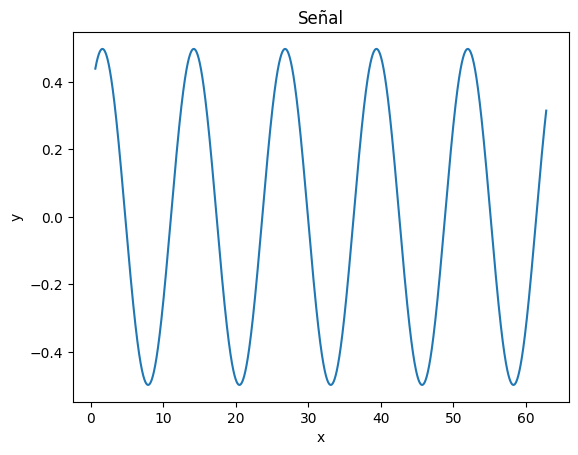

In [42]:
plt.plot(np.arange(xMinima, 20 * math.pi, 0.001), longitudSeñal)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Señal')

Se reproduce la señal

Para 400 Epoch

In [45]:
resultados, a, b, c = gradientesDecendiente(x, y, epoch=400)

Amplitude: 0.44678879584678155, Period: 0.4994497776898438, Constant: 0.9601730215459647, Error: 4.282518643943827
Amplitude: 0.4325211172049292, Period: 0.500285915219964, Constant: 0.9614034529229295, Error: 4.194295552961441
Amplitude: 0.41885280939928277, Period: 0.5011295003827775, Constant: 0.9627234384590304, Error: 4.422953785390686
Amplitude: 0.40653322984149143, Period: 0.5010723126835, Constant: 0.963575316318468, Error: 4.368123647591157
Amplitude: 0.3930214296529261, Period: 0.5009862957340367, Constant: 0.9644433813137231, Error: 4.640056413822284
Amplitude: 0.3814093063755447, Period: 0.5016294231427281, Constant: 0.9655339037689927, Error: 4.061485283195386
Amplitude: 0.3675035591021732, Period: 0.5011160744481643, Constant: 0.9660463791393846, Error: 4.370396276938189
Amplitude: 0.3526742814619931, Period: 0.5012312437705556, Constant: 0.966950174370922, Error: 4.839618563551169
Amplitude: 0.33838504897384225, Period: 0.5015706980508482, Constant: 0.9678708658169738, E

Amplitude: -0.34830902159992794, Period: 0.5792508430561223, Constant: 0.962702933830903, Error: 3.901040787784594
Amplitude: -0.3487719773152773, Period: 0.5816568476721861, Constant: 0.9629150849856113, Error: 3.833276770757517
Amplitude: -0.3530519227877521, Period: 0.5820297868447329, Constant: 0.9622046856723536, Error: 3.709894323548775
Amplitude: -0.3535384225084783, Period: 0.583905077096535, Constant: 0.96211107866868, Error: 3.996306304616081
Amplitude: -0.3583497046638812, Period: 0.5846793982533486, Constant: 0.9614834880269325, Error: 4.08943205684907
Amplitude: -0.3604182157305397, Period: 0.5861021255761019, Constant: 0.9612156198537349, Error: 3.8182204408820937
Amplitude: -0.35978413108607676, Period: 0.5873394354680707, Constant: 0.960765823999168, Error: 3.9784857841495715
Amplitude: -0.36019100182168495, Period: 0.5895872872728121, Constant: 0.9608081648279476, Error: 3.9760083901819727
Amplitude: -0.35970932343931217, Period: 0.5915713227373616, Constant: 0.9607631

Amplitude: -0.44044954253251534, Period: 0.7060556434109669, Constant: 0.9395215408442461, Error: 3.7582050255599366
Amplitude: -0.4392737810939796, Period: 0.7080416595364271, Constant: 0.9391466649061063, Error: 3.8151717793226174
Amplitude: -0.4421878588602618, Period: 0.7087249227953175, Constant: 0.9382450635087725, Error: 3.4762217694410453
Amplitude: -0.4401656991518794, Period: 0.7111229938055887, Constant: 0.9379635284679423, Error: 4.1013337806095
Amplitude: -0.4421645546808073, Period: 0.7120155978016616, Constant: 0.9370382398893105, Error: 3.78734216124996
Amplitude: -0.445666255915916, Period: 0.7140458244678018, Constant: 0.9366382054254233, Error: 3.710702024180225
Amplitude: -0.446178171393409, Period: 0.7148290966737681, Constant: 0.935637505565483, Error: 3.885988009366519
Amplitude: -0.4484540335622623, Period: 0.7152500326681837, Constant: 0.9345459315424229, Error: 3.6296765976549525
Amplitude: -0.45010163114874774, Period: 0.7160122478482245, Constant: 0.93355505

Amplitude: -0.5301273896825824, Period: 0.8216718572844784, Constant: 0.876394074496381, Error: 3.81655721989603
Amplitude: -0.5308329373423967, Period: 0.8234047059467821, Constant: 0.8753793399578983, Error: 4.002169529947057
Amplitude: -0.5321195880773579, Period: 0.8249375537325191, Constant: 0.8743328585516372, Error: 3.7822103329072005
Amplitude: -0.5328290470091399, Period: 0.826499958020813, Constant: 0.8732937164880822, Error: 3.881627847742675
Amplitude: -0.5345837797187561, Period: 0.8261948285984385, Constant: 0.8713655493644331, Error: 3.8596356386136685
Amplitude: -0.5368593642525059, Period: 0.8258595048548065, Constant: 0.8693662806193158, Error: 3.9141187449315176
Amplitude: -0.5379350767049111, Period: 0.8280950414553306, Constant: 0.8686433134365038, Error: 3.7719516425147632
Amplitude: -0.5377502528095521, Period: 0.8274328377031107, Constant: 0.8666378342049424, Error: 3.7109779401613237
Amplitude: -0.5361572693262209, Period: 0.8289362981855449, Constant: 0.865633

In [46]:
tablaResultados = pd.DataFrame(resultados, columns=['Amplitude', 'Period', 'Constant', 'Error'])
print(tablaResultados)

     Amplitude    Period  Constant     Error
0     0.446789  0.499450  0.960173  4.282519
1     0.432521  0.500286  0.961403  4.194296
2     0.418853  0.501130  0.962723  4.422954
3     0.406533  0.501072  0.963575  4.368124
4     0.393021  0.500986  0.964443  4.640056
..         ...       ...       ...       ...
395  -0.628732  0.950928  0.718882  3.700187
396  -0.631731  0.951895  0.716857  3.829307
397  -0.634518  0.952147  0.714390  4.021141
398  -0.634597  0.956497  0.714092  3.728841
399  -0.636417  0.954815  0.710801  3.863790

[400 rows x 4 columns]


In [50]:
xMinima = np.min(x)
longitud = [yPredecida(a, b, c, 0, xi) for xi in np.arange(xMinima, 20 * math.pi, 0.001).astype(np.float32)]

Text(0.5, 1.0, 'Señal generada')

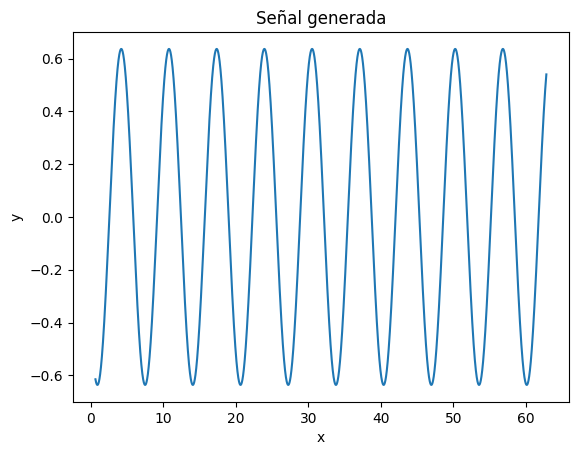

In [51]:
plt.plot(np.arange(xMinima, 20 * math.pi, 0.001), longitud)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Señal generada')

In [52]:
sd.play(longitud)

In [ ]:
sout